In [1]:
import torch
torch.__version__

'1.12.1'

### Scalars

0-dimensional tensors, alternatively put, it is a single number.

In [2]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
print(scalar.shape)         # shape means something different in PyTorch
print(type(scalar.shape))
print(scalar.ndim)

torch.Size([])
<class 'torch.Size'>
0


In [4]:
scalar.item() # returns with item in the tensor, !! only works with scalars

7

### Vectors 

 1-dimensional tensors. The items within them can represent many different things.

In [5]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [6]:
print(vector.shape)
print(vector.ndim)

torch.Size([2])
1


### Matrix

2-dimensional tensors. The items within them can represent many different things.

In [7]:
MATRIX = torch.tensor([[7,7],[7,7]])
MATRIX

tensor([[7, 7],
        [7, 7]])

In [8]:
print(MATRIX.shape)
print(MATRIX.ndim)

torch.Size([2, 2])
2


### Tensors

an n-dimensional array of numbers. Scalars, matrices, and vectors are all tensors.

In [9]:
TENSOR = torch.tensor([[[7,7],[7,7]],[[7,7],[7,7]],[[7,7],[7,7]]])
TENSOR

tensor([[[7, 7],
         [7, 7]],

        [[7, 7],
         [7, 7]],

        [[7, 7],
         [7, 7]]])

In [10]:
print(TENSOR.shape)
print(TENSOR.ndim)

torch.Size([3, 2, 2])
3


### Random tensors

In [11]:
random_tensor = torch.rand(size=(2,3))
random_tensor

tensor([[0.1725, 0.7096, 0.0608],
        [0.8094, 0.7576, 0.1952]])

In [12]:
print(random_tensor.shape)
print(random_tensor.ndim)
print(random_tensor.dtype)

torch.Size([2, 3])
2
torch.float32


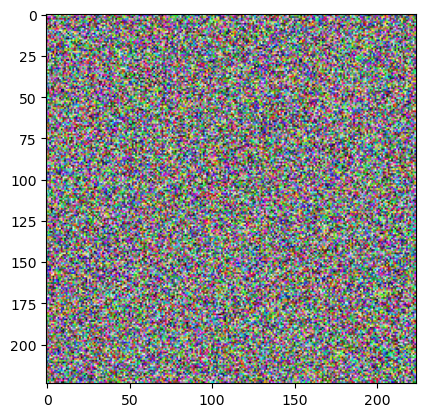

In [13]:
# create a random "image" tensor of shape 224, 224, 3
random_image_tensor = torch.rand(size=(224,224,3))

import matplotlib.pyplot as plt
plt.imshow(random_image_tensor)

In [14]:
# we can also create tensors full of zeros...
zeros_tensor = torch.zeros(size=(224,224))

# ... or full of ones. These are useful for filtering and masking
ones_tensor = torch.ones(size=(224,224))

# we can also create tensors with a range of values: torch.arange(start, end, step)
zero_to_ten = torch.arange(0,10,1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
# we can create tensors of zeros or ones with the same shape as another tensor using torch.zeros_like(input) or torch.ones_like(input)
zeros_like = torch.zeros_like(zero_to_ten)
ones_like = torch.ones_like(zero_to_ten)
print(zeros_like)
print(ones_like)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Tensor datatypes

see for all data types: https://pytorch.org/docs/stable/tensors.html#data-types

In [16]:
# the default data type for tensors is float 32
tensor = torch.tensor([1,2,3],
                      dtype=None,           # default to float 32
                      device=None,          # default to cpu. NOTE: my version of torch is not copiled with cuda.
                      requires_grad=False)  # won't record operations on tensor

print(tensor.dtype)
print(tensor.device)
print(tensor.shape)

torch.int64
cpu
torch.Size([3])


In [17]:
# we can do math with tensors:
tensor = torch.tensor([1,2,3])
tensor * 10 # haven't reassigned tensor, so it's still the same tensor

tensor([10, 20, 30])

In [18]:
%timeit tensor * 10

3.18 µs ± 208 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [19]:
%timeit torch.mul(tensor, 10) # same as torch.multiply()

2.82 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Matrix multiplication

For visualization: http://matrixmultiplication.xyz/

`NOTE`: the matrix multiplication is also referred to as the dot product.

uses torch.matmul() or torch.mm() or @ operator

Two main rules:
1) The inner dimensions `MUST` match
- (3, 2) @ (3, 2) won't work
- (2, 3) @ (3, 2) will work
- (3, 2) @ (2, 3) will work
2) The resulting matrix has the shape of the `outer` dimensions
- (2, 3) @ (3, 2) -> (2, 2)
- (3, 2) @ (2, 3) -> (3, 3)

If we have two tensors of the same size, we will need to reshape one of them before we can use matrix multiplication. `IMPORTANT:` the tensor you choose to reshape will determine the shape of the final product, which will have a shape of the outer dimensions of the two tensors.

In [20]:
tensor_A = torch.rand(size=(2,3))
tensor_B = torch.rand(size=(2,3))
try:
    tensor_C = torch.mm(tensor_A, tensor_B) # matrix multiplication
except RuntimeError:
    print('RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x3)')
    print('Inner dimensions must match!\n')
    print('RESULT OF torch.mm(tensor_A, tensor_B.T):')
    tensor_C = torch.mm(tensor_A, tensor_B.T)
    print(f'tensor c has shape: {tensor_C.shape}')
    print(f'tensor c has {tensor_C.ndim} dimensions')
    print(tensor_C)

    print('\nresult of torch.mm(tensor_A.T, tensor_B):')
    tensor_C = torch.mm(tensor_A.T, tensor_B)
    print(f'tensor c has shape: {tensor_C.shape}')
    print(f'tensor c has {tensor_C.ndim} dimensions')
    print(tensor_C)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x3)
Inner dimensions must match!

RESULT OF torch.mm(tensor_A, tensor_B.T):
tensor c has shape: torch.Size([2, 2])
tensor c has 2 dimensions
tensor([[0.2757, 0.6257],
        [0.4581, 0.2618]])

result of torch.mm(tensor_A.T, tensor_B):
tensor c has shape: torch.Size([3, 3])
tensor c has 2 dimensions
tensor([[0.0921, 0.2659, 0.1152],
        [0.1444, 0.4241, 0.2668],
        [0.2628, 0.7339, 0.0213]])


### Finding the min, max, mean, sum, etc

if tensor = torch.tensor([array]):

min or tensor.min() or torch.min(tensor)
max or tensor.max() or torch.max(tensor)
mean or tensor.mean() or torch.mean(tensor)
sum or tensor.sum() or torch.sum(tensor)

### Positional min and max

if tensor = torch.tensor([array]):
- tensor.argmax() -> returns the index of the max value
- tensor.argmin() -> returns the index of the min value

### Change tensor datatype

A common source of issues is having tensors with different data types.

In [21]:
tensor = torch.arange(0,100,10)
print(tensor)
tensor.dtype

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])


torch.int64

In [22]:
# We can change the data type to float16 by using:
tensor_16 = tensor.type(torch.float16)
print(tensor_16)

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)


### Squeezing etc

Tensors can be squeezed, unsqueezed, stacked etc.

In [23]:
# start with a vector:
x = torch.arange(1,8)
print(x, x.shape)

tensor([1, 2, 3, 4, 5, 6, 7]) torch.Size([7])


In [24]:
# Let's reshape the tensor:
x_reshaped = x.reshape(1,7)
print(x_reshaped, x_reshaped.shape)


tensor([[1, 2, 3, 4, 5, 6, 7]]) torch.Size([1, 7])


In [25]:
# We can accomplish the same thing with view:
z = x.view(1,7)
print(z, z.shape)

tensor([[1, 2, 3, 4, 5, 6, 7]]) torch.Size([1, 7])


In [26]:
# but now if we modify z, x will also be modified:
z[0,0] = 100
print(z, z.shape)
print(x, x.shape)

tensor([[100,   2,   3,   4,   5,   6,   7]]) torch.Size([1, 7])
tensor([100,   2,   3,   4,   5,   6,   7]) torch.Size([7])


In [27]:
# we can stack our tensor on top of itself, and we can do this vertically or horizontally:
x_stacked_dim0 = torch.stack([x,x,x,x,x], dim = 0)
x_stacked_dim1 = torch.stack([x,x,x,x,x], dim = 1)
print(x_stacked_dim0, x_stacked_dim0.shape)
print(x_stacked_dim1, x_stacked_dim1.shape)

tensor([[100,   2,   3,   4,   5,   6,   7],
        [100,   2,   3,   4,   5,   6,   7],
        [100,   2,   3,   4,   5,   6,   7],
        [100,   2,   3,   4,   5,   6,   7],
        [100,   2,   3,   4,   5,   6,   7]]) torch.Size([5, 7])
tensor([[100, 100, 100, 100, 100],
        [  2,   2,   2,   2,   2],
        [  3,   3,   3,   3,   3],
        [  4,   4,   4,   4,   4],
        [  5,   5,   5,   5,   5],
        [  6,   6,   6,   6,   6],
        [  7,   7,   7,   7,   7]]) torch.Size([7, 5])


In [28]:
# we can squeeze a tensor to remove all dimensions of size 1:
print(f'x_reshaped originally has shape: {x_reshaped.shape}')
x_reshaped_squeezed = x_reshaped.squeeze()
print(f'x_reshaped_squeezed has shape: {x_reshaped_squeezed.shape}')

x_reshaped originally has shape: torch.Size([1, 7])
x_reshaped_squeezed has shape: torch.Size([7])


In [29]:
# we can also 'unsqueeze' to add a dimension:
x = torch.arange(1,8)
print(f'x originally has shape: {x.shape}')
x_unsqueezed = x.unsqueeze(dim=0)
print(f'x_unsqueezed has shape: {x_unsqueezed.shape}')

# this is apparently the same as resize:
x = torch.arange(1,8)
print(f'x originally has shape: {x.shape}')
x_resized = x.resize_(1,7)
print(f'x_resized has shape: {x_resized.shape}')

x originally has shape: torch.Size([7])
x_unsqueezed has shape: torch.Size([1, 7])
x originally has shape: torch.Size([7])
x_resized has shape: torch.Size([1, 7])


`NOTE`: At some point it will be worth untangling the differences between resize, view, permute, unsqueeze, etc. There is a lot of overlap in functionality but it is likely that some are more limited and others make copies etc.

### Tensors and NumPy

- torch.from_numpy(ndarray) - NumPy array -> PyTorch tensor.
- torch.Tensor.numpy() - PyTorch tensor -> NumPy array.

In [30]:
import numpy as np

arr = np.arange(0,5)
print(arr, arr.shape, arr.dtype)
tens = torch.from_numpy(arr)
print(tens, tens.shape, tens.dtype)

[0 1 2 3 4] (5,) int64
tensor([0, 1, 2, 3, 4]) torch.Size([5]) torch.int64


`NOTE:` The numpy default data type is int64 or float64 but many pytorch calculations default to float32. 

In [31]:
# make sure to convert the dtype when converting from numpy to torch
arr = np.arange(0,5)
print(arr, arr.shape, arr.dtype)
tens = torch.from_numpy(arr).type(torch.float32)
print(tens, tens.shape, tens.dtype)

[0 1 2 3 4] (5,) int64
tensor([0., 1., 2., 3., 4.]) torch.Size([5]) torch.float32


In [32]:
# we can convert back to numpy:
arr = tens.numpy()
print(arr, arr.shape, arr.dtype)

[0. 1. 2. 3. 4.] (5,) float32


`NOTE:` Since we are reassigning the tensors/arrays, we can modify the originals without changing the others

### Reproducibility

Many tensors start out as random, but we can set the seed to make them reproducible.

In [33]:
# we can set the seed with a specific number:
torch.manual_seed(42)
x = torch.rand(size=(3,3))

# NOTE: You need to re-set the seed every time you call .rand() try commending out the line below:
torch.manual_seed(42)
y = torch.rand(size=(3,3))
x==y

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### Running tensors on GPUs

In [34]:
# we can check if a GPU is available with:
torch.cuda.is_available()

False

In [35]:
# we can make our code device agnostic with:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [36]:
# we can count the number of GPUs with:
torch.cuda.device_count()

0

`NOTE:` putting a tensor on a device using, e.g., `some_tensor.to(device)` will return a copy of the tensor on the device. That is, the same tensor will be on both the GPU and the CPU. To overwrite tensors you need to reassign them: `some_tensor = some_tensor.to(device)`

In [38]:
# by default, tensors are stored on the CPU
tens = torch.tensor([1,2,3])
tens.device

device(type='cpu')

In [39]:
# move the tensor to the GPU, if available:
tens_on_gpu = tens.to(device)
tens_on_gpu.device

device(type='cpu')

Tensors on the GPU can't be converted back to numpy arrays, if you try, you will get a TypeError.

In [ ]:
# if you want convert a tensor in gpu memory to a numpy array:
arr = tens_on_gpu.to('cpu').numpy()

# NOTE: the is exactly the same as:
arr = tens_on_gpu.cpu().numpy()